## Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

**Objective**: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.


---

### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

In [1]:
!pip install scipy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [4]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [5]:
frequency_table = df['category'].value_counts()
frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Motorbike Chassis                            107
Alexa Built-In Devices                       107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [6]:
proportion_table = df['category'].value_counts(normalize=True)
proportion_table

category
Sports & Outdoors                         0.342219
Beauty                                    0.007903
Handmade Clothing, Shoes & Accessories    0.007869
Bath & Body                               0.007813
Birthday Gifts                            0.007766
                                            ...   
Motorbike Chassis                         0.000044
Alexa Built-In Devices                    0.000044
Plugs                                     0.000044
Smart Home Security & Lighting            0.000043
Smart Speakers                            0.000022
Name: proportion, Length: 296, dtype: float64

In [7]:
top5_table = frequency_table.head(5)
top5_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [8]:
subset = df[df['category'].isin(top5_table.index)]
print(subset.head())

         uid        asin                                              title  \
82163  89483  B07DLGZ828  Neutrade GoPro 3M Sticky Pads Double Sided Adh...   
82164  89484  B09HGZHXJT  WOLFANG Action Camera 4K 20MP GA100, Waterproo...   
82165  89485  B08G2HBBB6  GoPro HERO9 - Waterproof Sports Camera with Fr...   
82166  89486  B09D15SFMQ  GoPro HERO10 Black - Waterproof Action Camera ...   
82167  89487  B08LD4VXGL  FitStill 60M/196FT Waterproof Case for Go Pro ...   

       stars  reviews   price  isBestSeller  boughtInLastMonth  \
82163    4.2     3116    6.49         False                  0   
82164    4.2     2594   49.99         False                  0   
82165    4.5     5161  199.00          True                  0   
82166    4.4     2467  249.99         False                  0   
82167    4.5     9879   16.98          True                  0   

                category  
82163  Sports & Outdoors  
82164  Sports & Outdoors  
82165  Sports & Outdoors  
82166  Sports & Outd

C:\Users\Pilar\AppData\Local\Temp\ipykernel_12664\3212449992.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_table.index, y=top5_table.values, palette="Set3")


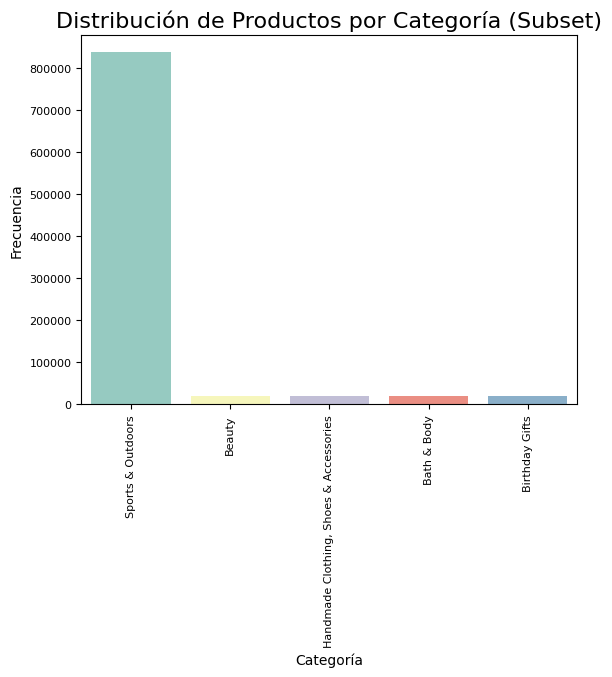

In [9]:
sns.barplot(x=top5_table.index, y=top5_table.values, palette="Set3")
plt.title('Distribución de Productos por Categoría (Subset)', fontsize=16)
plt.xlabel('Categoría', fontsize=10)
plt.ylabel('Frecuencia', fontsize=10)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.show()

Text(0.5, 1.0, 'Proporciones Top 5 Categorías')

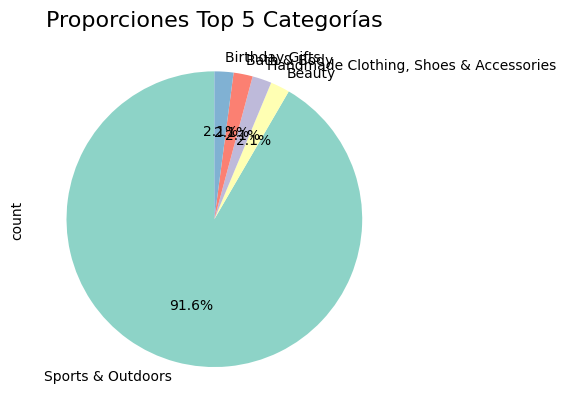

In [10]:
top5_table.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.title('Proporciones Top 5 Categorías', fontsize=16)

The category dominate is Sports & Outdoors

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [11]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

print(f"Precio promedio: {mean_price}")
print(f"Precio mediano: {median_price}")
print(f"Precio más común (moda): {mode_price}")

Precio promedio: 89.24380943923663
Precio mediano: 19.09
Precio más común (moda): 9.99


2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

In [15]:
variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quartiles_price = df['price'].quantile([0.25, 0.5, 0.75])

print(f"Varianza del precio: {variance_price}")
print(f"Desviación estándar del precio: {std_dev_price}")
print(f"Rango del precio: {range_price}")
print(f"Precio máximo: {max_price}")
print(f"Precio mínimo: {min_price}")
print(f"Rango intercuartílico del precio: {quartiles_price}")



Varianza del precio: 119445.48532254907
Desviación estándar del precio: 345.60886175349884
Rango del precio: 100000.0
Precio máximo: 100000.0
Precio mínimo: 0.0
Rango intercuartílico del precio: 0.25     9.99
0.50    19.09
0.75    45.99
Name: price, dtype: float64


3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

In [16]:
# Eliminar valores atípicos
filtered_df = df[df['price'] < df['price'].quantile(0.99)]

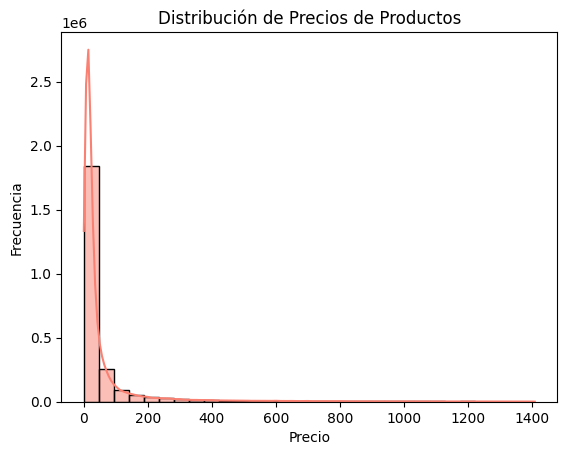

In [17]:
sns.histplot(filtered_df['price'], kde=True, bins=30, color="salmon")
plt.title('Distribución de Precios de Productos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

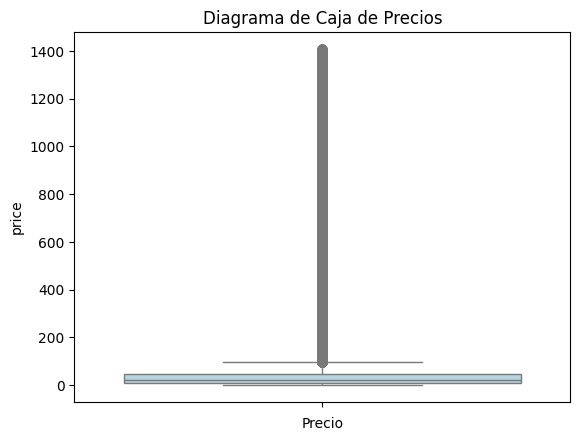

In [18]:
sns.boxplot(data = filtered_df['price'], color="lightblue")
plt.title('Diagrama de Caja de Precios')
plt.xlabel('Precio')
plt.show()

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

In [19]:
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]

print(f"Calificación promedio: {mean_rating}")
print(f"Calificación mediana: {median_rating}")
print(f"Calificación más común (moda): {mode_rating}")

Calificación promedio: 2.152836472966065
Calificación mediana: 0.0
Calificación más común (moda): 0.0


2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

In [21]:
variance_rating = df['stars'].var()
std_dev_rating = df['stars'].std()
min_rating = df['stars'].min()
max_rating = df['stars'].max()
range_rating = max_rating - min_rating
quantiles_rating = df['stars'].quantile([0.25, 0.5, 0.75])

print(f"Varianza de la calificación: {variance_rating}")
print(f"Desviación estándar de la calificación: {std_dev_rating}")
print(f"Rango de la calificación: {range_rating}")
print(f"Máxima calificación: {max_rating}")
print(f"Mínima calificación: {min_rating}")
print(f"Rango intercuartílico de la calificación: {quantiles_rating}")

Varianza de la calificación: 4.817434029796862
Desviación estándar de la calificación: 2.1948653785134207
Rango de la calificación: 5.0
Máxima calificación: 5.0
Mínima calificación: 0.0
Rango intercuartílico de la calificación: 0.25    0.0
0.50    0.0
0.75    4.4
Name: stars, dtype: float64


3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

In [22]:
skewness_rating = df['stars'].skew()
kurtosis_rating = df['stars'].kurtosis()

print(f"Asimetría de la calificación: {skewness_rating}")
print(f"Curtosis de la calificación: {kurtosis_rating}")

Asimetría de la calificación: 0.08120735761080985
Curtosis de la calificación: -1.9260061280432985


4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

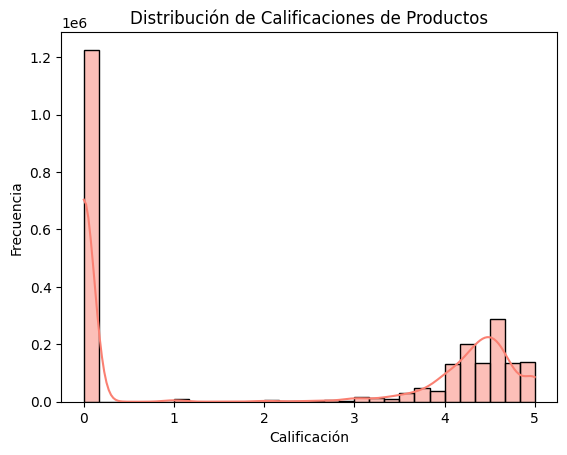

In [23]:
sns.histplot(df['stars'], kde=True, bins=30, color="salmon")
plt.title('Distribución de Calificaciones de Productos')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.show()